In [228]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

In [299]:
df = pd.read_csv('/content/test_appdata.csv')
labels = df.iloc[:,4].unique()
labels

array(['Standing', 'Sitting', 'Walking', 'Upstairs', 'Downstairs'],
      dtype=object)

In [300]:
df.head()
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df.iloc[:,4] = labelencoder.fit_transform(df.iloc[:,4])

In [301]:
X = pd.DataFrame(df.iloc[:,1:4])
Y = pd.DataFrame(df.iloc[:,4])

In [302]:
X

,x,y,z
0,0.75,-9.53,1.04
1,0.76,-9.55,1.05
2,0.77,-9.53,1.05
3,0.80,-9.53,1.01
4,0.87,-9.55,1.03
...,...,...,...
341919,1.13,-0.77,9.86
341920,1.91,0.20,10.12
341921,2.53,1.34,10.42
341922,1.75,0.68,9.61


In [303]:
print(df.iloc[:,4].unique())
print(Y)

[2 1 4 3 0]
        label
0           2
1           2
2           2
3           2
4           2
...       ...
341919      2
341920      2
341921      2
341922      2
341923      2

[341924 rows x 1 columns]


In [304]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [305]:
y_test

,label
31754,2
48451,1
223893,3
160874,4
152685,4
...,...
318769,1
102365,1
336491,1
58663,1


In [306]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [307]:
import tensorflow as tf

In [308]:
model = tf.keras.models.Sequential()

In [309]:
model.add(tf.keras.layers.Dense( units = 10, activation = 'relu',
                                input_dim = 3))

In [310]:
model.add(tf.keras.layers.Dense( units = 5, activation = 'relu'))

In [311]:
model.add(tf.keras.layers.Dropout(0.2))

In [312]:
model.add(tf.keras.layers.Dense(units = 5, activation = 'softmax'))

In [313]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [314]:
history =  model.fit(X_train, y_train,epochs =40, validation_data= (X_test, y_test),validation_split=0.2, verbose = 1)

Epoch 1/40
6839/6839 [==============================] - 12s 2ms/step - loss: 0.9909 - accuracy: 0.5780 - val_loss: 0.8214 - val_accuracy: 0.6683
Epoch 2/40
6839/6839 [==============================] - 11s 2ms/step - loss: 0.8986 - accuracy: 0.6203 - val_loss: 0.8083 - val_accuracy: 0.6728
Epoch 3/40
6839/6839 [==============================] - 11s 2ms/step - loss: 0.8732 - accuracy: 0.6297 - val_loss: 0.7708 - val_accuracy: 0.6854
Epoch 4/40
6839/6839 [==============================] - 11s 2ms/step - loss: 0.8435 - accuracy: 0.6433 - val_loss: 0.7501 - val_accuracy: 0.6977
Epoch 5/40
6839/6839 [==============================] - 12s 2ms/step - loss: 0.8313 - accuracy: 0.6475 - val_loss: 0.7416 - val_accuracy: 0.7003
Epoch 6/40
6839/6839 [==============================] - 12s 2ms/step - loss: 0.8221 - accuracy: 0.6512 - val_loss: 0.7284 - val_accuracy: 0.7022
Epoch 7/40
6839/6839 [==============================] - 12s 2ms/step - loss: 0.8180 - accuracy: 0.6517 - val_loss: 0.7262 - val_ac

In [315]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

2138/2138 [==============================] - 3s 1ms/step - loss: 0.6934 - accuracy: 0.7096


In [316]:
import numpy as np
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 1, 0, ..., 1, 1, 4])

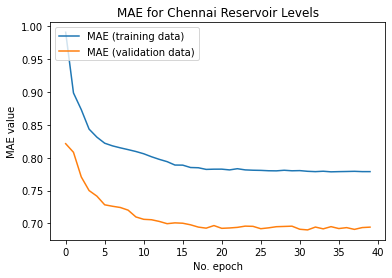

In [317]:
plt.plot(history.history['loss'], label='MAE (training data)')
plt.plot(history.history['val_loss'], label='MAE (validation data)')
plt.title('MAE for Chennai Reservoir Levels')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

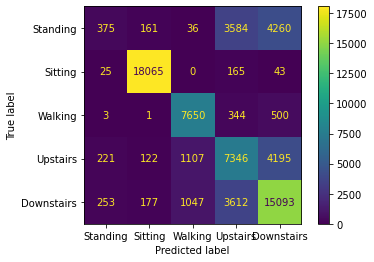

In [318]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)
import seaborn as sns
dis = ConfusionMatrixDisplay(cm, display_labels= labels)
dis.plot()

In [319]:
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)

0.7096439277619361

In [320]:
y_test = label_binarize(y_test, classes=[0,1,2,3,4])
y_pred = label_binarize(y_pred, classes=[0,1,2,3,4])
n_classes = 5

In [321]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

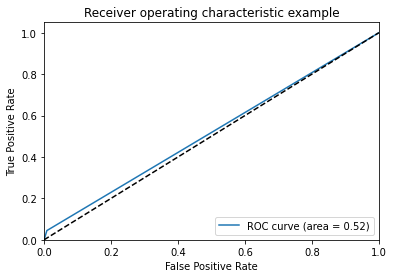

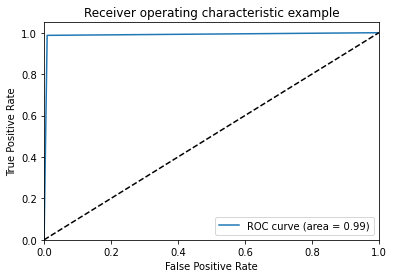

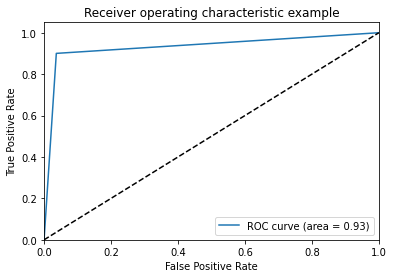

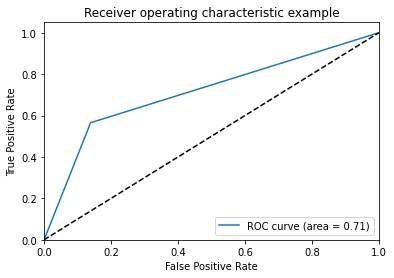

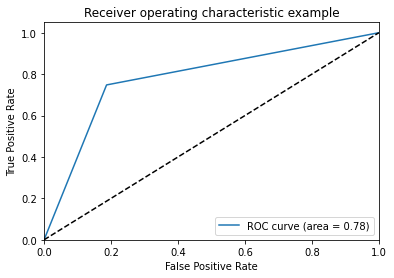

In [322]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()